In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data and storing as DataFrame
data= pd.read_csv('car_fuel_efficiency.csv')
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


#### Preparing the dataset

In [4]:
#preparing dataset
df= data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


#### EDA

##### Look at the fuel_efficiency_mpg variable. Does it have a long tail?

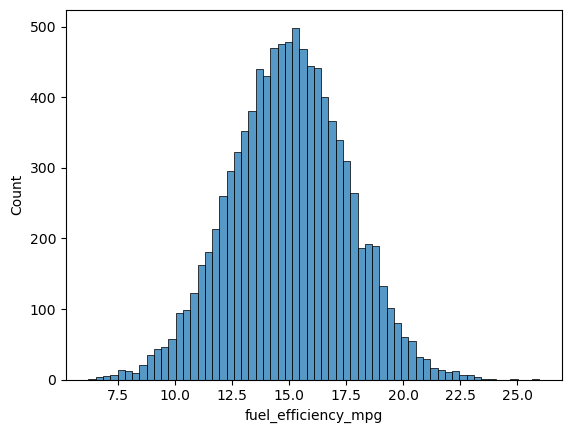

In [7]:
#plotting histogram for variable fuel_efficiency_mpg
sns.histplot(data= df, x= 'fuel_efficiency_mpg')
plt.show()

##### No, the distribution is normal, It does not have a long tail.

#### Question 1

##### There's one column with missing values. What is it?

In [11]:
#total missing values in all the columns of the dataset
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

##### Answer 1: horsepower column has 708 missing values.

#### Question 2

##### What's the median (50% percentile) for variable 'horsepower'?

In [15]:
#calculating median for variable 'horsepower'
horsepower_median= df['horsepower'].median()
print(horsepower_median)

149.0


##### Answer 2: The median of horsepower variable is 149.

#### Prepare and split the dataset

##### Shuffle the dataset (the filtered one you created above), use seed 42.

In [19]:
#total number of rows in the dataset
n= len(df)
n

9704

In [20]:
#shuffling the dataset using seed= 42
idx= np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

##### Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [22]:
#Splitting the number of rows for train, validation and test sets
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [23]:
#Splitting the dataset into train, validation and test sets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [24]:
#dropping the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
#y-values for train, validation and test sets
y_train= df_train.fuel_efficiency_mpg.values
y_val= df_val.fuel_efficiency_mpg.values
y_test= df_test.fuel_efficiency_mpg.values

In [26]:
#removing target variable from the train, validation and test sets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#### Question 3

##### Imputing 0 for missing values 

In [29]:
#dealing with missing values from question1 
def prepare_X_with_0(df):
    df['horsepower']= df['horsepower'].fillna(0)
    X= df.values
    return X

In [30]:
#training linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [31]:
#preparing X_train with 0 value for NA
X_train_with_0= prepare_X_with_0(df_train)

In [32]:
#training the model with linear regression
w0, w= train_linear_regression(X_train_with_0, y_train)
print('w0: ',w0, 'w:', w)

w0:  28.827365476144056 w: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992868e-04]


In [33]:
#preparing validation set with 0 value for NA
X_val= prepare_X_with_0(df_val)

In [34]:
#predicting values for target variable
y_pred= w0 + X_val.dot(w)

In [35]:
#calculating root mean squared error
def rmse(y, y_pred):
    se= (y - y_pred) ** 2
    mse= se.mean()
    rmse= np.sqrt(mse)

    return rmse

In [36]:
#rounding rmse to 2 decimal places
round(rmse(y_val, y_pred),2)

0.52

##### Imputing mean for missing values

In [38]:
#imputing missing values with mean
def prepare_X_with_mean(df):
    horsepower_mean= df['horsepower'].mean()
    df['horsepower']= df['horsepower'].fillna(horsepower_mean)
    X= df.values
    return X

In [39]:
#preparing X_train with mean value for NA
X_train_with_mean= prepare_X_with_mean(df_train)

In [40]:
#training the model with linear regression
w0, w= train_linear_regression(X_train_with_mean, y_train)
print('w0: ',w0, 'w:', w)

w0:  28.827365476144056 w: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992868e-04]


In [41]:
#preparing validation set with mean value for NA
X_val= prepare_X_with_mean(df_val)
#predicting values for target variable
y_pred= w0 + X_val.dot(w)

In [42]:
#calculating root mean squared error
round(rmse(y_val, y_pred),2)

0.52

##### Which option gives better RMSE?

##### Answer 3: Both are equally good

#### Question 4

In [46]:
#Using regularization
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [47]:
#using different regularization parameters
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train_with_0= prepare_X_with_0(df_train)
    w0, w= train_linear_regression_reg(X_train_with_0, y_train,r=r)
    X_val= prepare_X_with_0(df_val)
    y_pred= w0 + X_val.dot(w)
    score= rmse(y_val, y_pred)
    print('r:',r,'w0:', w0, 'score:', score)


r: 0 w0: 28.827365476144056 score: 0.5173782638854011
r: 0.01 w0: 24.926838421020392 score: 0.5171115525772979
r: 0.1 w0: 11.239661085046578 score: 0.5187525130700571
r: 1 w0: 1.7315979412697624 score: 0.5222348802092389
r: 5 w0: 0.3638075020731069 score: 0.5228916092823451
r: 10 w0: 0.18306246622720368 score: 0.5229812979636552
r: 100 w0: 0.01841801730765491 score: 0.5230636233819926


##### Which r gives the best RMSE?

##### Answer 4: r= 0.01 gives best rmse.

#### Question 5

In [51]:
#trying different seed values for splitting the data
n= len(df)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx= np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train= df_train.fuel_efficiency_mpg.values
    y_val= df_val.fuel_efficiency_mpg.values
    y_test= df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train_with_0= prepare_X_with_0(df_train)
    w0, w= train_linear_regression(X_train_with_0, y_train)
    X_val= prepare_X_with_0(df_val)
    y_pred= w0 + X_val.dot(w)
    score=rmse(y_val, y_pred)
    print('seed', seed, 'rmse', score)

seed 0 rmse 0.5206531296282488
seed 1 rmse 0.5213388912852449
seed 2 rmse 0.5228069974790948
seed 3 rmse 0.5159516741126557
seed 4 rmse 0.5109129460051677
seed 5 rmse 0.528340646010539
seed 6 rmse 0.5313910658196378
seed 7 rmse 0.5090670387410288
seed 8 rmse 0.5147399129519309
seed 9 rmse 0.5131865908214442


In [52]:
list_scores= [ 0.5206531296282488,0.5213388912852449, 0.5228069974790948, 0.5159516741126557, 0.5109129460051677, 0.528340646010539, 0.5313910658196378,
              0.5090670387410288,0.5147399129519309, 0.5131865908214442]

In [53]:
#calculating standard deviation of rmse scores
scores_std=np.std(list_scores)
scores_std

0.006989446427098498

##### Answer 5: 0.006

#### Question 6

In [56]:
#shuffling data using random seed = 9 
idx= np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [57]:
#splitting rows for train, validation and test sets
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [58]:
#splitting dataset into train, validation and test sets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [59]:
#resetting and dropping the index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
#y-values for train, validation and test sets
y_train= df_train.fuel_efficiency_mpg.values
y_val= df_val.fuel_efficiency_mpg.values
y_test= df_test.fuel_efficiency_mpg.values

In [61]:
#deleting target variable from train, validation and test sets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [62]:
#combining train and validation sets into training set
df_full_train=pd.concat([df_train, df_val])
df_full_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,240,136.0,4050.512290,2006
1,190,141.0,3195.866942,2017
2,200,184.0,3006.164370,2017
3,200,NaN,2947.143980,2022
4,250,132.0,3114.371978,2001


In [63]:
#resetting and dropping index
df_full_train= df_full_train.reset_index(drop=True)

In [64]:
#imputing 0 for missing values 
X_full_train= prepare_X_with_0(df_full_train)

In [65]:
#combining y-values from train and validation sets into training set
y_full_train= np.concatenate([y_train, y_val])

In [66]:
#training the model using linear regression and calculating the weights
w0, w= train_linear_regression_reg(X_full_train, y_full_train, r= 0.001)

In [67]:
#imputing 0 for missing values
X_test= prepare_X_with_0(df_test)
#predicting values for the target varible
y_pred= w0 + X_test.dot(w)
#calculating root mean squared error score
score= rmse(y_test, y_pred)
score

0.5156261299189354

##### Answer 6: 0.515